In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn import metrics

Desafio Classificação e Regressão Titanic

○ Observamos que o modelo do KNN conseguiu classificar com uma
acurácia média de 70%

○ Com isso, 30% das amostras foram classificadas incorretamente,
trazendo estimativas valores pagos por não sobreviventes que na
verdade podem ter sobrevivido

○ Tarefa: Avaliar o desempenho de uma Árvore de Decisão como
modelo de classificação e o impacto do ajuste no resultado geral

In [169]:
data = pd.read_csv("titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [170]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [171]:
age_mean = data['Age'].mean()

data['Age'] = data['Age'].fillna(age_mean)
data['Embarked'] = data['Embarked'].dropna()
data.drop(['Cabin'], axis=1, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [172]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [173]:
# Coding categorical variables

data_coded = data.copy()

data_coded.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
data_coded["Sex"] = data_coded["Sex"].map({'male': 0, 'female': 1})
data_coded["Embarked"] = data_coded["Embarked"].map({'C': 0, 'Q': 1, 'S': 2})


data_coded.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2.0
1,1,1,1,38.0,1,0,71.2833,0.0
2,1,3,1,26.0,0,0,7.9250,2.0
3,1,1,1,35.0,1,0,53.1000,2.0
4,0,3,0,35.0,0,0,8.0500,2.0


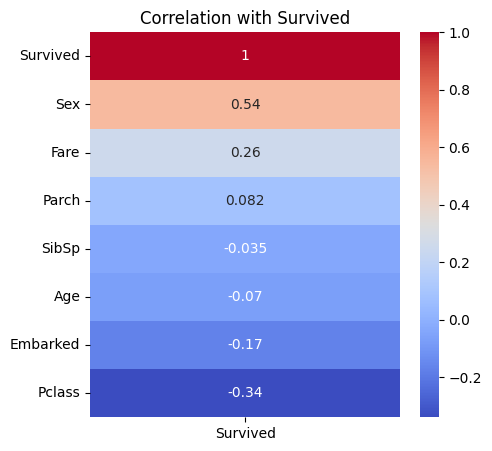

In [174]:
corr_matrix = data_coded.corr()

plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix[['Survived']].sort_values(by='Survived', ascending=False), annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation with Survived')
plt.show()

In [175]:
X = data_coded.drop(columns=['Survived'], axis=1)
y = data['Survived']

## Random Forest

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [177]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, criterion='entropy')
rf_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [178]:
y_pred_rf = rf_model.predict(X_test)

In [179]:
from sklearn.metrics import confusion_matrix, classification_report

# Random Forest Metrics Resume
print("Random Forest Classifier Report")
print(metrics.classification_report(y_test, y_pred_rf))

Random Forest Classifier Report
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



## XGBoost

In [180]:
xgb_model = xgb.XGBClassifier(random_state=42, n_estimators = 100)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [181]:
y_pred_xgb = xgb_model.predict(X_test)

In [182]:
print("XGBoost Classifier Report")
print(metrics.classification_report(y_test, y_pred_xgb))

XGBoost Classifier Report
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       105
           1       0.77      0.77      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

